# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 3.8MB 60.7MB/s 
     |████████████████████████████████| 450kB 51.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c87711076e07da053be70d5ac290d938fed4075d3946bdcefd07c3831df923a6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/Deep Learning/Project 11 NLP/"

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [0]:
import pandas as pd

df = pd.read_json('https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json',lines=True)

In [5]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [6]:
df.drop(columns='article_link', inplace=True)
df.head(5)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [0]:
def findLen(str): 
    counter = 0    
    for i in str: 
        counter += 1
    return counter

In [8]:
longest_string = max(df['headline'], key=len)
print(longest_string)
print(findLen(longest_string))

hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet
926


In [9]:
headline_length = []
for ind in df.index: 
     headline_length.append(findLen(df['headline'][ind]))

headline_length[4000]

77

#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [0]:
max_features = 10000
maxlen = 926
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['headline'].values)

# Define X and y for your model.

In [13]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 28619
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [14]:
print(tokenizer.word_index)

{'to': 1, 'of': 2, 'the': 3, 'in': 4, 'for': 5, 'a': 6, 'on': 7, 'and': 8, 'with': 9, 'is': 10, 'new': 11, 'trump': 12, 'man': 13, 'at': 14, 'from': 15, 'about': 16, 'by': 17, 'after': 18, 'you': 19, 'this': 20, 'out': 21, 'up': 22, 'be': 23, 'as': 24, 'that': 25, 'it': 26, 'how': 27, 'not': 28, 'he': 29, 'his': 30, 'are': 31, 'your': 32, 'just': 33, 'what': 34, 'all': 35, 'who': 36, 'has': 37, 'will': 38, 'report': 39, 'into': 40, 'more': 41, 'one': 42, 'have': 43, 'year': 44, 'over': 45, 'why': 46, 'day': 47, 'u': 48, 'area': 49, 'woman': 50, 'can': 51, 's': 52, 'says': 53, 'donald': 54, 'time': 55, 'first': 56, 'like': 57, 'no': 58, 'her': 59, 'get': 60, 'off': 61, 'old': 62, "trump's": 63, 'life': 64, 'now': 65, 'people': 66, "'": 67, 'an': 68, 'house': 69, 'still': 70, 'obama': 71, 'white': 72, 'back': 73, 'make': 74, 'was': 75, 'than': 76, 'women': 77, 'if': 78, 'down': 79, 'when': 80, 'i': 81, 'my': 82, '5': 83, 'clinton': 84, 'could': 85, 'they': 86, 'their': 87, 'before': 88, 

#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [22]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd
print('Loaded %s word vectors.' % len(embeddings))

Loaded 400000 word vectors.


# Create a weight matrix for words in training docs

In [0]:
EMBEDDING_DIM = embeddings.get('a').shape[0]
word_index = tokenizer.word_index
MAX_NUM_WORDS = max_features
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():
	if (i > MAX_NUM_WORDS):
		embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

(30885, 200)


Text(0.5, 1.0, 'example vectors')

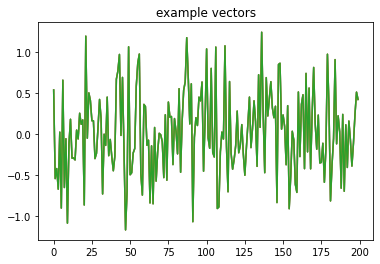

In [29]:
## Peeking at the embedding matrix values

import matplotlib.pyplot as plt
print(embedding_matrix.shape)
plt.plot(embedding_matrix[16])
plt.plot(embedding_matrix[37])
plt.plot(embedding_matrix[18])
plt.title('example vectors')

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [0]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [0]:
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1], weights= [embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences = True),merge_mode='concat'))
model.add(TimeDistributed(Dense(100,activation='relu')))
model.add(Flatten())
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 926, 200)          6177000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 926, 200)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 926, 128)          135680    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 926, 100)          12900     
_________________________________________________________________
flatten_1 (Flatten)          (None, 92600)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               9260100   
_________________________________________________________________
activation_8 (Activation)    (None, 100)             

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(22895, 926) (22895,)
(5724, 926) (5724,)


In [72]:
batch_size = 100
epochs = 5

training_history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_test, y_test))

Train on 22895 samples, validate on 5724 samples
Epoch 1/5
22895/22895 [==============================] - 1142s 50ms/sample - loss: 0.6769 - accuracy: 0.5712 - val_loss: 0.6775 - val_accuracy: 0.5704
Epoch 2/5
22895/22895 [==============================] - 1169s 51ms/sample - loss: 0.6750 - accuracy: 0.5736 - val_loss: 0.6774 - val_accuracy: 0.5702
Epoch 3/5
22895/22895 [==============================] - 1191s 52ms/sample - loss: 0.6741 - accuracy: 0.5724 - val_loss: 0.6803 - val_accuracy: 0.5580
Epoch 4/5
22895/22895 [==============================] - 1203s 53ms/sample - loss: 0.6742 - accuracy: 0.5735 - val_loss: 0.6792 - val_accuracy: 0.5617
Epoch 5/5
22895/22895 [==============================] - 1220s 53ms/sample - loss: 0.6745 - accuracy: 0.5741 - val_loss: 0.6771 - val_accuracy: 0.5697


In [73]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Accuracy: %.2f" % (acc))

5724/1 - 72s - loss: 0.6839 - accuracy: 0.5697
Score: 0.68
Accuracy: 0.57


In [77]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in y_pred])
print('  Classification Report:\n',classification_report(y_test,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      2991
           1       0.00      0.00      0.00      2733

    accuracy                           0.52      5724
   macro avg       0.26      0.50      0.34      5724
weighted avg       0.27      0.52      0.36      5724
 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


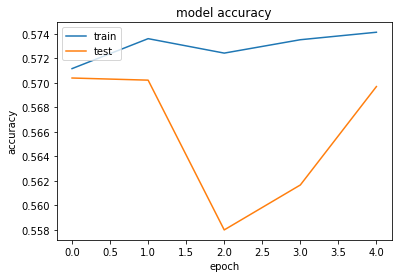

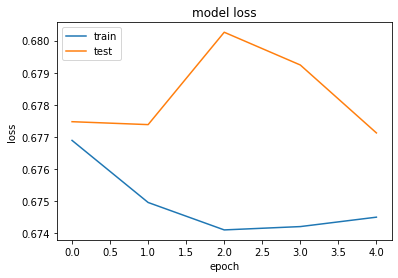

In [80]:
import matplotlib.pyplot as plt

plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [81]:
my_text = 'I called Pizza Hut to ask to order at Dominos, both of us had a good laugh.'

seq = tokenizer.texts_to_sequences([my_text])
print('raw seq:',seq)
seq = pad_sequences(seq, maxlen=maxlen)
print('padded seq:',seq)
prediction = model.predict(seq)
print('Is Sarcastic:',prediction)

raw seq: [[81, 635, 1039, 5273, 1, 641, 1, 597, 14, 2026, 2, 240, 257, 6, 131, 2372]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  

Conclusion

As we can see in the graphs and acores of the model, it does not perform pretty well. Seems like, it is overfitting on the data.
But as we test with a demo text, it seems to correctly identify a comment as sarcastic or non sarcastic.